In [15]:
# scikit-learn
# https://scikit-learn.org/stable/
# What is machine learning?
# Machine learning is the process whereby:
# Computers are given the ability to learn to make decisions from data
# without being explicitly programmed!

# Unsupervised learning
# Uncovering hidden paerns from unlabeled data
# Example:
# Grouping customers into distinct categories (Clustering)

# Supervised learning
# The predicted values are known
# Aim: Predict the target values of unseen data, given the features
    
# Types of supervised learning
# Classication: Target variable consists of categories
# Regression: Target variable is continuous
    
# Naming conventions
# Feature = predictor variable = independent variable
# Target variable = dependent variable = response variable    

# Before you use supervised learning
# Requirements:
# No missing values
# Data in numeric format
# Data stored in pandas DataFrame or NumPy array

# Perform Exploratory Data Analysis (EDA) first

# scikit-learn syntax
# from sklearn.module import Model
# model = Model()
# model.fit(X, y)
# predictions = model.predict(X_new)
# print(predictions) # 1 predict and 0 not predict

In [16]:
import pandas as pd
import numpy as np
churn_df = pd.read_csv('datasets/telecom_churn_clean.csv')
churn_df.head()

# churn has values of 0 or 1, so it can be predicted using a binary classification model.

,Unnamed: 0,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [17]:
# Classifying labels of unseen data
# 1. Build a model
# 2. Model learns from the labeled data we pass to it
# 3. Pass unlabeled data to the model as input
# 4. Model predicts the labels of the unseen data

# Labeled data = training data

# k-Nearest Neighbors
# Predict the label of a data point by
# Looking at the k closest labeled data points
# Taking a majority vote

#Using scikit-learn to fit a classifier
from sklearn.neighbors import KNeighborsClassifier
X = churn_df[["total_day_charge","total_eve_charge"]].values
y = churn_df["churn"].values
print(X.shape, y.shape)

(3333, 2) (3333,)


In [18]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=15)

In [19]:
#Predicting on unlabeled data
X_new = np.array([[56.8, 17.5],[24.4, 24.1],[50.1, 10.9]])
print(X_new.shape)

(3, 2)


In [20]:
predictions = knn.predict(X_new)
print('Predictions: {}'.format(predictions))

Predictions: [1 0 0]


In [21]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Create arrays for the features and the target variable
y = churn_df["churn"].values
X = churn_df[["account_length", "customer_service_calls"]].values

# Create a KNN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

In [22]:
X_new = np.array([[30.0, 17.5],
                  [107.0, 24.1],
                  [213.0, 10.9]])

# Predict the labels for the X_new
y_pred = knn.predict(X_new )

# Print the predictions for X_new
print("Predictions: {}".format(y_pred)) 

Predictions: [0 1 0]


In [23]:
# Measuring model performance
# accuracy = correct predictions / total observations
# split data into training set and test set
# Fit/train classifier on training set
# Calculate accuracy using test set
import pandas as pd
import numpy as np
churn_df = pd.read_csv('datasets/telecom_churn_clean.csv')
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=21, stratify=y)
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
print(knn.score(X_test, y_test))

0.86


In [ ]:
# Model complexity
# Larger k = less complex model = can cause under
# Smaller k = more complex model = can lead to over

In [24]:
# Model complexity and over/underfitting
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 26)
for neighbor in neighbors:
    knn = KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train, y_train)
    train_accuracies[neighbor] = knn.score(X_train, y_train)
    test_accuracies[neighbor] = knn.score(X_test, y_test)

print(neighbors, '\n', train_accuracies, '\n', test_accuracies)    

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25] 
 {1: 1.0, 2: 0.8898414059151307, 3: 0.9039862837548222, 4: 0.8752678954136305, 5: 0.8838405486498071, 6: 0.8709815687955422, 7: 0.873981997428204, 8: 0.8658379768538362, 9: 0.8696956708101158, 10: 0.8628375482211744, 11: 0.866266609515645, 12: 0.8606943849121304, 13: 0.8624089155593656, 14: 0.8598371195885126, 15: 0.861551650235748, 16: 0.8585512216030862, 17: 0.8594084869267038, 18: 0.8576939562794685, 19: 0.8585512216030862, 20: 0.8568366909558508, 21: 0.8576939562794685, 22: 0.8555507929704244, 23: 0.8559794256322332, 24: 0.8555507929704244, 25: 0.8559794256322332} 
 {1: 0.793, 2: 0.852, 3: 0.839, 4: 0.86, 5: 0.859, 6: 0.86, 7: 0.865, 8: 0.862, 9: 0.862, 10: 0.859, 11: 0.861, 12: 0.859, 13: 0.86, 14: 0.859, 15: 0.86, 16: 0.859, 17: 0.862, 18: 0.86, 19: 0.86, 20: 0.858, 21: 0.859, 22: 0.857, 23: 0.857, 24: 0.856, 25: 0.856}


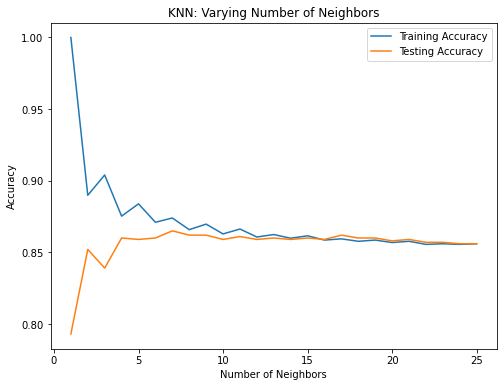

In [26]:
# Plotting our results
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")
plt.show()

In [25]:
# Regression
# target is continuous
# Predicting blood glucose levels
import pandas as pd
diabetes_df = pd.read_csv("datasets/diabetes_clean.csv")
print(diabetes_df.head())

   pregnancies  glucose  diastolic  triceps  insulin   bmi    dpf  age  \
0            6      148         72       35        0  33.6  0.627   50   
1            1       85         66       29        0  26.6  0.351   31   
2            8      183         64        0        0  23.3  0.672   32   
3            1       89         66       23       94  28.1  0.167   21   
4            0      137         40       35      168  43.1  2.288   33   

   diabetes  
0         1  
1         0  
2         1  
3         0  
4         1  


In [26]:
# Creating feature and target arrays
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [83]:
print(X)

[[ 6.    72.    35.    ...  0.627 50.     1.   ]
 [ 1.    66.    29.    ...  0.351 31.     0.   ]
 [ 8.    64.     0.    ...  0.672 32.     1.   ]
 ...
 [ 5.    72.    23.    ...  0.245 30.     0.   ]
 [ 1.    60.     0.    ...  0.349 47.     1.   ]
 [ 1.    70.    31.    ...  0.315 23.     0.   ]]


In [27]:
# Making predictions from a single feature
X_bmi = X[:, 4]
print(y.shape, X_bmi.shape)


(768,) (768,)


In [28]:
X_bmi = X_bmi.reshape(-1, 1)
print(X_bmi.shape)
#X_bmi = X_bmi[X_bmi != 0]

(768, 1)


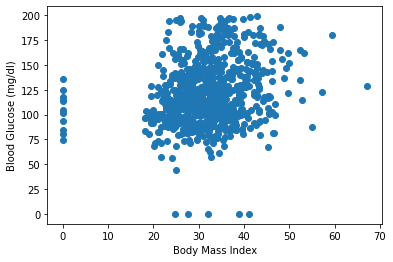

In [29]:
# Plotting glucose vs. body mass index
import matplotlib.pyplot as plt
plt.scatter(X_bmi, y)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

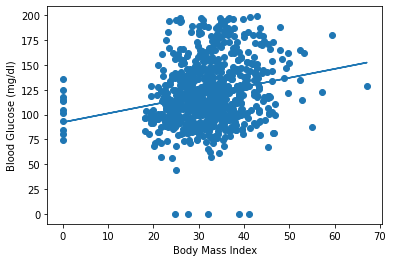

In [30]:
# Fitting a regression model
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_bmi, y)
predictions = reg.predict(X_bmi)
plt.scatter(X_bmi, y)
plt.plot(X_bmi, predictions)
plt.ylabel("Blood Glucose (mg/dl)")
plt.xlabel("Body Mass Index")
plt.show()

In [31]:
import numpy as np
import pandas as pd
sales_df = pd.read_csv("datasets/advertising_and_sales_clean.csv")
# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1,1)

# Check the shape of the features and targets
print(X.shape,y.shape)

(4546, 1) (4546,)


In [32]:
# Import LinearRegression
from sklearn.linear_model import LinearRegression

# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X,y)

# Make predictions
predictions = reg.predict(X)

print(predictions[:5])

[ 95491.17119147 117829.51038393 173423.38071499 291603.11444202
 111137.28167129]


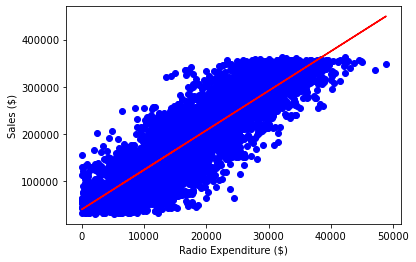

In [33]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Create scatter plot
plt.scatter(X,y, color="blue")

# Create line plot
plt.plot(X,predictions,  color="red")
plt.xlabel("Radio Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

In [ ]:
# Basic of liner regression
# Regression mechanics
# y = ax + b
# Simple linear regression uses one feature
# y = target
# x = single feature
# a, b = parameters/coe)cients of the model - slope, intercept
# How do we choose a and b?
# De,ne an error function for any given line
# Choose the line that minimizes the error function
# Error function = loss function = cost function
# Ordinary Least Squares
# Ordinary Least Squares (OLS): minimize RSS
# Linear regression in higher dimensions
# y = a x + a x + b
# To ,t a linear regression model here:
# Need to specify 3 variables: a , a , b
# In higher dimensions:
# Known as multiple regression
# Must specify coe)cients for each feature and the variable b
# y = a x + a x + a x + ... + a x + b
# scikit-learn works exactly the same way:
# Pass two arrays: features and target

In [34]:
import numpy as np
import pandas as pd
sales_df = pd.read_csv("datasets/advertising_and_sales_clean.csv")
from sklearn.linear_model import LinearRegression


# Create X and y arrays
X = sales_df.drop(["sales","influencer"], axis=1).values
y = sales_df["sales"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(X_train, y_train)

# Make predictions
y_pred = reg.predict(X_train)
print("Predictions: {}, Actual Values: {}".format(y_pred[:2], y_test[:2]))


Predictions: [ 99542.74670817 185017.82496091], Actual Values: [55261.28 67574.9 ]


In [ ]:
# R-squared
# R : quanties the variance in target values
# explained by the features
# Values range from 0 to 1
# High R(square) : Low R(Square) :
# Mean squared error and root mean squared error
# MSE = (y − )
# MSE is measured in target units, squared
# RMSE = square root of MSE
# Measure RMSE in the same units at the target variable

In [ ]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

# Compute R-squared
r_squared = reg.score(X_test, y_test)

# Compute RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(rmse))

### Cross-validation motivation
- Model performance is dependent on the way we split up the data
- Not representative of the model's ability to generalize to unseen data
- Solution: Cross-validation!

<!-- Cross-validation and model performance
5 folds = 5-fold CV
10 folds = 10-fold CV
k folds = k-fold CV
More folds = More computationally expensive -->

In [36]:
#Cross-validation in scikit-learn
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=6, shuffle=True, random_state=42)
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=kf)

#Evaluating cross-validation peformance
print(cv_results)
print(np.mean(cv_results), np.std(cv_results))
print(np.quantile(cv_results, [0.025, 0.975]))

[0.99900913 0.99898729 0.99897163 0.99898887 0.99893043 0.99905966]
0.9989911695584723 3.895599514495595e-05
[0.99893558 0.99905335]


In [37]:
import numpy as np
import pandas as pd
sales_df = pd.read_csv("datasets/advertising_and_sales_clean.csv")
# Create X from the radio column's values
X = sales_df["radio"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X
X = X.reshape(-1,1)


# Import the necessary modules
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_results = cross_val_score(reg, X, y, cv=kf)

# Print scores
print(cv_results)

[0.74470218 0.7724344  0.76841901 0.74186012 0.75174985 0.7444348 ]


In [9]:
import numpy as np
# Print the mean
print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

# An average score of 0.75 with a low standard deviation is pretty good for a model out of the box! 
# Now let's learn how to apply regularization to our regression models.

0.7539333927705617
0.01209745544789685
[0.74218195 0.77193247]


## Regularized regression

In [ ]:
# Why regularize?
# Recall: Linear regression minimizes a loss function
# It chooses a coffecient, a, for each feature variable, plus b
# Large coffecients can lead to overing
# Regularization: Penalize large coecients
    
# Ridge regression
# Loss function = OLS loss function + α ∗ a
# Ridge penalizes large positive or negative coffecients
# α: parameter we need to choose
# Picking α is similar to picking k in KNN
# Hyperparameter: variable used to optimize model parameters
# α controls model complexity
# α = 0 = OLS (Can lead to overing)
# Very high α: Can lead to undefittring

In [38]:
# Ridge regression in scikit-learn
from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
 ridge = Ridge(alpha=alpha)
 ridge.fit(X_train, y_train)
 y_pred = ridge.predict(X_test)
 scores.append(ridge.score(X_test, y_test))
print(scores)

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387]


In [ ]:
# Lasso regression
# Loss function = OLS loss function +

In [39]:
# Lasso regression in scikit-learn
from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
 lasso = Lasso(alpha=alpha)
 lasso.fit(X_train, y_train)
 lasso_pred = lasso.predict(X_test)
 scores.append(lasso.score(X_test, y_test))
print(scores)

[0.9990152104762495, 0.9990152105072273, 0.9990152107889495, 0.9990152111033483, 0.9990152120375869]


In [ ]:
# Lasso regression for feature selection
# Lasso can select important features of a dataset
# Shrinks the coefficients of less important features to zero
# Features not shrunk to zero are selected by lasso

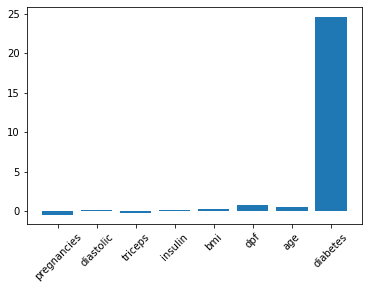

In [40]:
# Lasso for feature selection in scikit-learn
from sklearn.linear_model import Lasso
X = diabetes_df.drop("glucose", axis=1).values
y = diabetes_df["glucose"].values
names = diabetes_df.drop("glucose", axis=1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.show()

In [42]:
# Regularized regression: Ridge
# Ridge regression performs regularization by computing the squared values of the model parameters multiplied
# by alpha and adding them to the loss function.

In [43]:
# Import Ridge
from sklearn.linear_model import Ridge
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []
for alpha in alphas:
  
  # Create a Ridge regression model
  ridge = Ridge(alpha=alpha)
  
  # Fit the data
  ridge.fit(X_train,y_train)
  
  # Obtain R-squared
  score = ridge.score(X_test,y_test)
  ridge_scores.append(score)
print(ridge_scores)

#The scores don't appear to change much as alpha increases, which is indicative of how well the features explain the variance in the target—even
#by heavily penalizing large coefficients, underfitting does not occur!

[0.9990152104759369, 0.9990152104759373, 0.9990152104759419, 0.9990152104759871, 0.9990152104764387, 0.9990152104809561]


In [ ]:
# # Lasso regression for feature importance
# # lasso regression can be used to identify important features in a dataset.

# # Import Lasso
# from sklearn.linear_model import Lasso

# # Instantiate a lasso regression model
# lasso = Lasso(alpha=0.3)

# # Fit the model to the data
# lasso.fit(X,y)



# # Compute and print the coefficients
# lasso_coef = lasso.fit(X,y).coef_
# print(lasso_coef)
# plt.bar(sales, lasso_coef)
# plt.xticks(rotation=45)
# plt.show()

# #See how the figure makes it clear that expenditure on TV advertising is 
# #the most important feature in the dataset to predict sales values!

## Fine tune your model

- Classification metrics
- Measuring model performance with accuracy:
    - Fraction of correctly classied samples
    - Not always a useful metric
 
- Class imbalance
- Classication for predicting fraudulent bank transactions
    - 99% of transactions are legitimate; 1% are fraudulent
- Could build a classier that predicts NONE of the transactions are fraudulent
    - 99% accurate!
    - But terrible at actually predicting fraudulent transactions
    - Fails at its original purpose
- Class imbalance: Uneven frequency of classes
- Need a dierent way to assess performance

- Confusion matrix for assessing classification
    - performance
    - Confusion matrix
    - 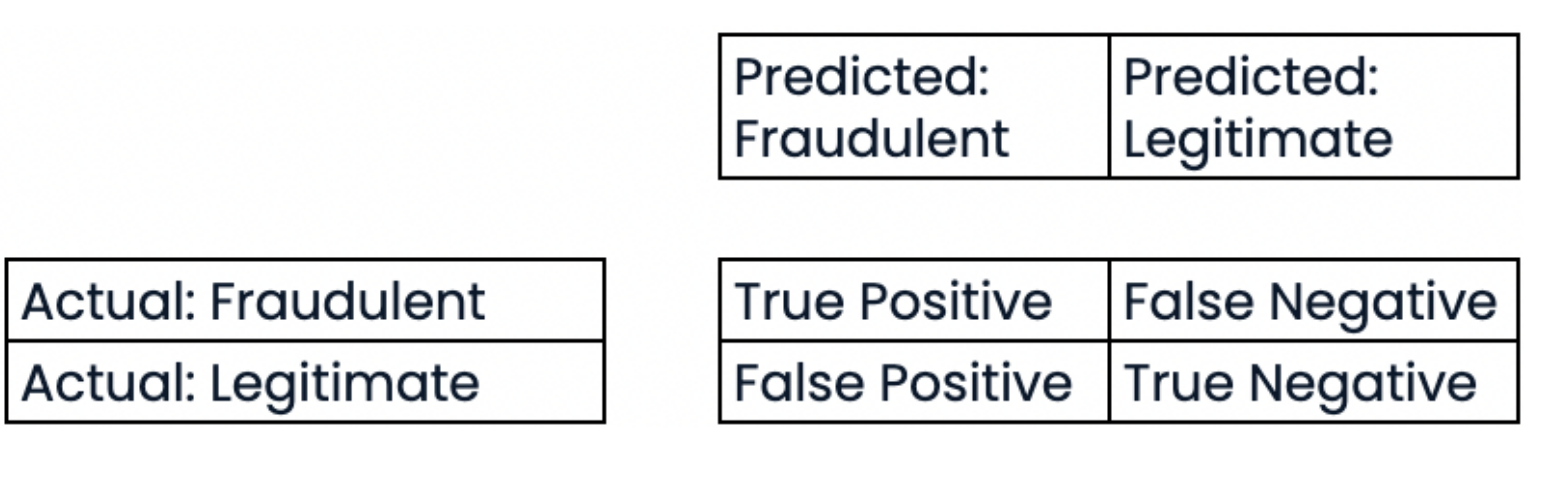
    
- Assessing classification performance

- Accuracy
  tp + tn / tp + tn + fp + fn
  
- Precision
  tp / tp + fp
    - High precision = lower false positive rate
    - High precision: Not many legitimate transactions are predicted to be fraudulent
    
Remember that precision is the proportion of positive labels correctly identified.
Precision can be improved by maximizing the number of true positives and minimizing false negatives.    
    
- Recall
  tp / tp + fn
    - High recall = lower false negative rate
    - High recall: Predicted most fraudulent transactions correctly  
    
- F1 score
    - F1 Score: 2 ∗ (precision ∗ recall)/(precision + recall)

In [48]:
# Confusion matrix in scikit-learn
from sklearn.metrics import classification_report, confusion_matrix
knn = KNeighborsClassifier(n_neighbors=7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=42)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


In [49]:
# Classification report in scikit-learn
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
          44       0.00      0.00      0.00         0
          56       0.00      0.00      0.00         0
          57       0.00      0.00      0.00         0
          61       0.00      0.00      0.00         1
          62       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         0
          67       0.00      0.00      0.00         0
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         0
          73       0.00      0.00      0.00         2
          74       0.00      0.00      0.00         3
          75       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         1
          77       0.00      0.00      0.00         2
          78       0.00      0.00      0.00         3
          79       0.00    

C:\software\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\software\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\software\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\software\anaconda3\lib\site-packages\sklearn\metrics\_classification.

In [50]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix,classification_report 

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
          44       0.00      0.00      0.00         0
          56       0.00      0.00      0.00         0
          57       0.00      0.00      0.00         0
          61       0.00      0.00      0.00         1
          62       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         0
          67       0.00      0.00      0.00         0
          68       0.00      0.00      0.00         1
          71       0.00      0.00      0.00         1
          72       0.00      0.00      0.00         0
          73       0.00      0.00      0.00         2
          74       0.00      0.00      0.00         3
          75       0.00      0.00      0.00         1
          76       0.00      0.00      0.00         1
          77   

C:\software\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\software\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\software\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\software\anaconda3\lib\site-packages\sklearn\metrics\_classification.

## Logistic regression and the ROC curve

In [51]:
import pandas as pd
import numpy as np
churn_df = pd.read_csv('datasets/telecom_churn_clean.csv')
from sklearn.model_selection import train_test_split

X = churn_df.drop("churn", axis=1).values
y = churn_df["churn"].values

In [ ]:
# Logistic regression for binary classification
# Logistic regression is used for classification problems
# Logistic regression outputs probabilities
# If the probability, p > 0.5:
# The data is labeled 1
# If the probability, p < 0.5:
# The data is labeled 0

In [ ]:
# Logistic regression in scikit-learn
# from sklearn.linear_model import LogisticRegression
# logreg = LogisticRegression()
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
# logreg.fit(X_train, y_train)
# y_pred = logreg.predict(X_test)

# Predicting probabilities
# y_pred_probs = logreg.predict_proba(X_test)[:, 1]
# print(y_pred_probs[0])

In [ ]:
# Probability thresholds
# By default, logistic regression threshold = 0.5
# Not specic to logistic regression
# KNN classiers also have thresholds
# What happens if we vary the threshold?

In [ ]:
# Plotting the ROC curve
# from sklearn.metrics import roc_curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
# plt.plot([0, 1], [0, 1],'k--')
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Logistic Regression ROC Curve')
# plt.show()

# ROC AUC in scikit-learn
# from sklearn.metrics import roc_auc_score
# print(roc_auc_score(y_test, y_pred_probs))

In [53]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train,y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.16137117 0.04558627 0.11403398 0.27487289 0.09786313 0.04958807
 0.02987531 0.09776446 0.21051734 0.11330542]


C:\software\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


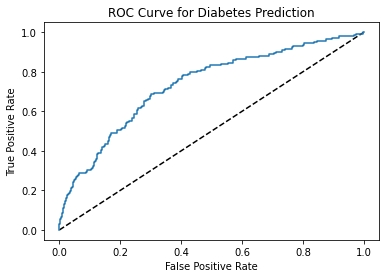

In [54]:
# Import roc_curve
from sklearn.metrics import roc_curve

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

#the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

#The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

In [55]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

# Calculate the classification report
print(classification_report(y_test, y_pred))

#Did you notice that logistic regression performs better than the KNN model across all the metrics you calculated? 
#A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels! scikit-learn makes 
#it easy to produce several classification metrics with only a few lines of code.

0.7320462501325979
[[856   1]
 [139   4]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       857
           1       0.80      0.03      0.05       143

    accuracy                           0.86      1000
   macro avg       0.83      0.51      0.49      1000
weighted avg       0.85      0.86      0.80      1000



## Hyperparameter tuning

In [ ]:
# Hyperparameter tuning
# Ridge/lasso regression: Choosing alpha
# KNN: Choosing n_neighbors
# Hyperparameters: Parameters we specify before ing the model
# Like alpha and n_neighbors


# Choosing the correct hyperparameters
# 1. Try lots of different hyperparameter values
# 2. Fit all of them separately
# 3. See how well they perform
# 4. Choose the best performing values

# This is called hyperparameter tuning

# It is essential to use cross-validation to avoid overing to the test set
# We can still split the data and perform cross-validation on the training set
# We withhold the test set for final evaluation

Grid search cross-validation
Grid search cross-validation

Limitations and an alternative approach
3-fold cross-validation, 1 hyperparameter, 10 total values = 30 ts
10 fold cross-validation, 3 hyperparameters, 30 total values = 900 ts


In [56]:
# Import GridSearchCV
from sklearn.model_selection  import GridSearchCV

# Set up the parameter grid
param_grid = {"alpha": np.linspace(0.00001, 1,20)}

# Instantiate lasso_cv
lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train, y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

#Unfortunately, the best model only has an R-squared score of 0.33,
#highlighting that using the optimal hyperparameters does not guarantee a high performing model!

C:\software\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.658e+01, tolerance: 2.347e-02
  model = cd_fast.enet_coordinate_descent(
C:\software\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.111e+01, tolerance: 2.495e-02
  model = cd_fast.enet_coordinate_descent(
C:\software\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.868e+01, tolerance: 2.425e

Tuned lasso paramaters: {'alpha': 1e-05}
Tuned lasso score: 0.16366278572329832


C:\software\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.077e+02, tolerance: 2.905e-02
  model = cd_fast.enet_coordinate_descent(


In [ ]:
# # Create the parameter space
# params = {"penalty": ["l1", "l2"],
#          "tol": np.linspace(0.0001, 1.0, 50),
#          "C": np.linspace(0.1, 1.0, 50),
#          "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# # Instantiate the RandomizedSearchCV object
# logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# # Fit the data to the model
# logreg_cv.fit(X_train, y_train)

# # Print the tuned parameters and score
# print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
# print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

## Preprocession data

- scikit-learn requirements
    - Numeric data
    - No missing values
- With real-world data:
    - This is rarely the case
    - We will oen need to preprocess our data first
    
- Dealing with categorical features
    - scikit-learn will not accept categorical features by default
    - Need to convert categorical features into numeric values
- Convert to binary features called dummy variables
    - 0: Observation was NOT that category
    - 1: Observation was that category  
    
    
- Dealing with categorical features in Python
    - scikit-learn: OneHotEncoder()
    - pandas: get_dummies()    

In [9]:
# Music dataset
# popularity : Target variable
# genre : Categorical feature


In [12]:
# Encoding dummy variables

# import pandas as pd
# music_df = pd.read_csv('datasets/music_clean.csv')
# music_dummies = pd.get_dummies(music_df["genre"], drop_first=True)
# print(music_dummies.head())

# music_dummies = pd.concat([music_df, music_dummies], axis=1)
# music_dummies = music_dummies.drop("genre", axis=1)

In [ ]:
# Encoding dummy variables

# music_dummies = pd.get_dummies(music_df, drop_first=True)
# print(music_dummies.columns)

In [ ]:
# Linear regression with dummy variables

# from sklearn.model_selection import cross_val_score, KFold
# from sklearn.linear_model import LinearRegression
# X = music_dummies.drop("popularity", axis=1).values
# y = music_dummies["popularity"].values
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# kf = KFold(n_splits=5, shuffle=True, random_state=42)
# linreg = LinearRegression()
# linreg_cv = cross_val_score(linreg, X_train, y_train, cv=kf,scoring="neg_mean_squared_error")
# print(np.sqrt(-linreg_cv))

## Handling missing data
- Missing data
- No value for a feature in a particular row
- This can occur because:
    - There may have been no observation
    - The data might be corrupt
- We need to deal with missing data

In [ ]:
print(music_df.isna().sum().sort_values())
#Dropping missing data
music_df = music_df.dropna(subset=["genre","popularity","loudness","liveness","tempo"])
print(music_df.isna().sum().sort_values())

### Imputing values
- Imputation - use subject-matter expertise to replace missing data with educated guesses
- Common to use the mean
- Can also use the median, or another value
- For categorical values, we typically use the most frequent value - the mode
- Must split our data first, to avoid data leakage

In [ ]:
# Imputation with scikit-learn
from sklearn.impute import SimpleImputer
X_cat = music_df["genre"].values.reshape(-1, 1)
X_num = music_df.drop(["genre","popularity"], axis=1).values
y = music_df["popularity"].values
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2,random_state=12)
X_train_num, X_test_num, y_train, y_test = train_test_split(X_num, y, test_size=0.2,random_state=12)

imp_cat = SimpleImputer(strategy="most_frequent")
X_train_cat = imp_cat.fit_transform(X_train_cat)
X_test_cat = imp_cat.transform(X_test_cat)

# Imputation with scikit-learn
imp_num = SimpleImputer()
X_train_num = imp_num.fit_transform(X_train_num)
X_test_num = imp_num.transform(X_test_num)
X_train = np.append(X_train_num, X_train_cat, axis=1)
X_test = np.append(X_test_num, X_test_cat, axis=1)
# Imputers are known as transformers

In [ ]:
# Imputing within a pipeline
from sklearn.pipeline import Pipeline
music_df = music_df.dropna(subset=["genre","popularity","loudness","liveness","tempo"])
music_df["genre"] = np.where(music_df["genre"] == "Rock", 1, 0)
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values

# Imputing within a pipeline
steps = [("imputation", SimpleImputer()),("logistic_regression", LogisticRegression())]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

## Centering and scaling
- Why scale our data?
    - Many models use some form of distance to inform them
    - Features on larger scales can disproportionately influence the model
    - Example: KNN uses distance explicitly when making predictions
    - We want features to be on a similar scale
    - Normalizing or standardizing (scaling and centering)
    
- How to scale our data
- Subtract the mean and divide by variance
    - All features are centered around zero and have a variance of one
    - This is called standardization
- Can also subtract the minimum and divide by the range
    - Minimum zero and maximum one
- Can also normalize so the data ranges from -1 to +1
- See scikit-learn docs for further details    

In [ ]:
# Why scale our data?
print(music_df[["duration_ms","loudness","speechiness"]].describe())

In [ ]:
# Scaling in scikit-learn
from sklearn.preprocessing import StandardScaler
X = music_df.drop("genre", axis=1).values
y = music_df["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(np.mean(X), np.std(X))
print(np.mean(X_train_scaled), np.std(X_train_scaled))

# Scaling in a pipeline
steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier(n_neighbors=6))]
pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=21)
knn_scaled = pipeline.fit(X_train, y_train)
y_pred = knn_scaled.predict(X_test)
print(knn_scaled.score(X_test, y_test))

# Comparing performance using unscaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=21)
knn_unscaled = KNeighborsClassifier(n_neighbors=6).fit(X_train, y_train)
print(knn_unscaled.score(X_test, y_test))


# CV and scaling in a pipeline
from sklearn.model_selection import GridSearchCV
steps = [('scaler', StandardScaler()),('knn', KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = {"knn__n_neighbors": np.arange(1, 50)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=21)
cv = GridSearchCV(pipeline, param_grid=parameters)
cv.fit(X_train, y_train)
y_pred = cv.predict(X_test)

# Checking model parameters
print(cv.best_score_)
print(cv.best_params_)

In [ ]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("lasso", Lasso(alpha=0.5))]

# Instantiate the pipeline
pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

# Calculate and print R-squared
print(pipeline.score(X_test, y_test))

In [ ]:
# Build the steps
steps = [("scaler", StandardScaler()),
         ("logreg", LogisticRegression())]
pipeline = Pipeline(steps)

# Create the parameter space
parameters = {"logreg__C": np.linspace(0.001, 1.0, 20)}
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=21)

# Instantiate the grid search object
cv = GridSearchCV(pipeline, param_grid=parameters)

# Fit to the training data
cv.fit(X_train, y_train)
print(cv.best_score_, "\n", cv.best_params_)

#Using a pipeline shows that a logistic regression model with "C" set to approximately
#0.1 produces a model with 0.8425 accuracy!

## Evaluating multiple models

- Different models for different problems
- Some guiding principles
- Size of the dataset
    - Fewer features = simpler model, faster training time
    - Some models require large amounts of data to perform well
- Interpretability
    - Some models are easier to explain, which can be important for stakeholders
    - Linear regression has high interpretability, as we can understand the coecients
- Flexibility
    - May improve accuracy, by making fewer assumptions about data
    - KNN is a more flexible model, doesn't assume any linear relationships
    
- It's all in the metrics
- Regression model performance:
    - RMSE
    - R-squared
- Classication model performance:
    - Accuracy
    - Confusion matrix
    - Precision, recall, F1-score
    - ROC AUC
- Train several models and evaluate performance out of the box 

- A note on scaling
- Models affected by scaling:
    - KNN
    - Linear Regression (plus Ridge, Lasso)
    - Logistic Regression
    - Articial Neural Network
    
- Best to scale our data before evaluating models

In [ ]:
# Evaluating classification models
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

X = music.drop("genre", axis=1).values
y = music["genre"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Evaluating classification models
models = {"Logistic Regression": LogisticRegression(),"KNN": KNeighborsClassifier(),
          "Decision Tree": DecisionTreeClassifier()}
results = []

for model in models.values():
 kf = KFold(n_splits=6, random_state=42, shuffle=True)
 cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
 results.append(cv_results)

plt.boxplot(results, labels=models.keys())
plt.show()

# Test set performance
for name, model in models.items():
 model.fit(X_train_scaled, y_train)
 test_score = model.score(X_test_scaled, y_test)
 print("{} Test Set Accuracy: {}".format(name, test_score))

In [ ]:
models = {"Linear Regression": LinearRegression(), "Ridge": Ridge(alpha=0.1), "Lasso": Lasso(alpha=0.1)}
results = []

# Loop through the models' values
for model in models.values():
  kf = KFold(n_splits=6, random_state=42, shuffle=True)
  
  # Perform cross-validation
  cv_scores = cross_val_score(model,X_train, y_train, cv=kf)
  
  # Append the results
  results.append(cv_scores)

# Create a box plot of the results
plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
# Import mean_squared_error
from sklearn.metrics import mean_squared_error

for name, model in models.items():
  
  # Fit the model to the training data
  model.fit(X_train_scaled,y_train)
  
  # Make predictions on the test set
  y_pred = model.predict(X_test_scaled)
  
  # Calculate the test_rmse
  test_rmse = mean_squared_error(y_test, y_pred, squared=False)
  print("{} Test Set RMSE: {}".format(name, test_rmse))

In [ ]:
# Create models dictionary
models = {"Logistic Regression": LogisticRegression(), "KNN": KNeighborsClassifier(), "Decision Tree Classifier": DecisionTreeClassifier()}
results = []

# Loop through the models' values
for model in models.values():
  
  # Instantiate a KFold object
  kf = KFold(n_splits=6, random_state=12, shuffle=True)
  
  # Perform cross-validation
  cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kf)
  results.append(cv_results)
plt.boxplot(results, labels=models.keys())
plt.show()

In [ ]:
# Create steps
steps = [("imp_mean", SimpleImputer()), 
         ("scaler", StandardScaler()), 
         ("logreg", LogisticRegression())]

# Set up pipeline
pipeline = Pipeline(steps)
params = {"logreg__solver": ["newton-cg", "saga", "lbfgs"],
         "logreg__C": np.linspace(0.001, 1.0, 10)}

# Create the GridSearchCV object
tuning = GridSearchCV(pipeline, param_grid=params)
tuning.fit(X_train, y_train)
y_pred = tuning.predict(X_test)

# Compute and print performance
print("Tuned Logistic Regression Parameters: {}, Accuracy: {}".format(tuning.best_params_,tuning.score(X_test, y_test)))

### Summary
- Using supervised learning techniques to build predictive models
- For both regression and classication problems
- Undering and overing
- How to split data
- Cross-validation

- Data preprocessing techniques
- Model selection
- Hyperparameter tuning
- Model performance evaluation
- Using pipelines

- Where to go from here?
- Machine Learning with Tree-Based Models in Python
- Preprocessing for Machine Learning in Python
- Model Validation in Python
- Feature Engineering for Machine Learning in Python
- Unsupervised Learning in Python
- Machine Learning Projects